In [5]:
import os
import cv2
import numpy as np
import pandas as pd
from random import shuffle

import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
TRAIN_DIR = 'C:/Users/sanketn/Documents/IU/Kaggle/Project 2/train/'
TEST_DIR = 'C:/Users/sanketn/Documents/IU/Kaggle/Project 2/test/'

ROWS = 128
COLS = 128
CHANNELS = 3

images_dog = [img for img in os.listdir(TRAIN_DIR) if "dog" in img]
images_cat = [img for img in os.listdir(TRAIN_DIR) if "cat" in img]

train_dog = images_dog[:1000]
train_cat = images_cat[:1000]

train_list = train_dog + train_cat
print(train_list[:3])

['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg']


In [74]:
test_list = [img for img in os.listdir(TEST_DIR)]
print(test_list[:3])

['1.jpg', '10.jpg', '100.jpg']


In [75]:
train = np.ndarray(shape=(len(train_list),ROWS, COLS))
labels = np.ndarray(len(train_list))

for i, img_path in enumerate(train_list):
    img = cv2.imread(os.path.join(TRAIN_DIR, img_path), 0)
    img = cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)
    
    train[i] = img
    if "dog" in img_path:
        labels[i] = 0
    else:
        labels[i] = 1

In [76]:
test = np.ndarray(shape=(len(test_list),ROWS, COLS))

for i, img_path in enumerate(test_list):
    img = cv2.imread(os.path.join(TEST_DIR, img_path), 0)
    img = cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)
    
    test[i] = img

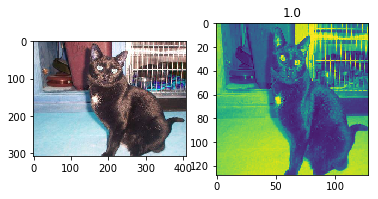

In [78]:
n = 321
plt.subplot(1,2,1)
plt.imshow(cv2.imread(os.path.join(TRAIN_DIR, train_list[len(train_list)-n])))
plt.subplot(1,2,2)
plt.imshow(train[len(train_list)-n])
plt.title(labels[len(train_list)-n])
plt.show()

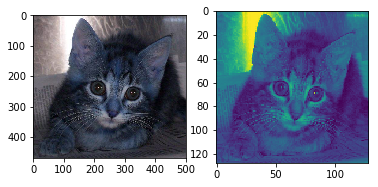

In [57]:
n = 219
plt.subplot(1,2,1)
plt.imshow(cv2.imread(os.path.join(TEST_DIR, test_list[len(test_list)-n])))
plt.subplot(1,2,2)
plt.imshow(test[len(test_list)-n])
#plt.title(labels[len(train_list)-n])
plt.show()

In [79]:
train[3]

array([[185., 185., 186., ...,  35.,  36.,  37.],
       [185., 187., 183., ...,  44.,  41.,  34.],
       [188., 185., 185., ...,  38.,  43.,  38.],
       ...,
       [161., 163., 152., ...,  69.,  75.,  70.],
       [165., 163., 160., ...,  72.,  71.,  61.],
       [169., 168., 164., ...,  64.,  63.,  72.]])

In [80]:
train = (train - train.min()) / (train.max() - train.min())
test = (test - test.min()) / (test.max() - test.min())

In [83]:
nsamples, nx, ny = train.shape
d2_train_dataset = train.reshape((nsamples,nx*ny))
print(nsamples,nx,ny)

2000 128 128


In [84]:
#labels_test = labels[:1000]
labels.shape

(2000,)

In [ ]:
from sklearn.ensemble import  AdaBoostClassifier
from sklearn import cross_validation
from sklearn import linear_model
numbers = [40, 80, 160]
alphas = [0.1, 0.3, 1.0, 3.0]
regs = ["l1", "l2"]
scores = []
param = []
for alpha in alphas:
    for reg in regs:
        lm = linear_model.LogisticRegression(penalty = reg, C = alpha)
        lm.fit(d2_train_dataset, labels)
        for number in numbers:
            ada_lm = AdaBoostClassifier(lm, n_estimators = number)
            scores.append(cross_validation.cross_val_score(ada_lm, d2_train_dataset, labels, scoring="accuracy", cv = 10).mean())
            param.append([alpha, reg, number])
scores = pd.DataFrame({'parameter': param, 'score': scores})
print(scores.sort_values(by = 'score', ascending = False))